In [1]:
# ============================================================
# Notebook setup
# ============================================================

%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 5)

from util import util
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
from sklearn.metrics import r2_score
import os

# Load data
data_folder = os.path.join('..', 'data')

data = util.load_communities_data(data_folder)
attributes = data.columns[3:-1]
target = data.columns[-1]

tr_frac = 0.8 # 80% data for training
tr_sep = int(len(data) * tr_frac)
nf = [a for a in attributes if a != 'race'] + [target]

tmp = data.iloc[:tr_sep]
scale = tmp[nf].max()
sdata = data.copy()
sdata[nf] /= scale[nf]

sdata[attributes] = sdata[attributes].astype(np.float32)
sdata[target] = sdata[target].astype(np.float32)

tr = sdata.iloc[:tr_sep]
ts = sdata.iloc[tr_sep:]

protected = {'race': (0, 1)}

# Lagrangian Approaches for Constrained ML

There's Lagrangian and Lagrangian

## Constrained Machine Learning

**We have some constraints, in the general form:**

$$
g[\hat{Y}] \leq 0 \quad \text{ with: } \hat{Y} = f(X; \theta), x \sim P(X)
$$

* The model input $X$ is represented as a _random variable_ with distribution $P(X)$
* The output $\hat{Y}$ is a _deterministic function_ of the input $X$
* $g[\cdot]$ represents a (possibly vector) function defined _over the distribution_ of $\hat{Y}$

**The formulation above is very general, but also challenging to deal with**

For this reason, we often take a _Monte Carlo approximation_:

$$
g(\hat{y}) \leq 0 \quad \text{ with: } \hat{y} = f(x; \theta) \text{ for a sample: } \{x_i\}_{i=1}^m
$$

* Under this assumption, $g$ becomes a regular function

## Constrained Training Process

**Our goal is training a model that satisfies the constraints**

We can frame the problem as:

$$
\mathop{\rm argmin}_{\theta}\{L(\hat{y}) \mid \hat{y} = f(x; \theta), g(\hat{y}) \leq 0\}
$$

* As a main trick, we use the training data to for the loss function
* ...But also to approximate the constraint function

**The basic ingredients are the same as in knowledge injection**

* However, in knowledge injection the constraints are meant to improve accuracy
* Here, feasibility is _more important_ than being accurate

During the evaluation, feasibility and accuracy should be _checked separately_

## Constrained Training Process

**Our goal is training a model that satisfies the constraints**

We can frame the problem as:

$$
\mathop{\rm argmin}_{\theta}\{L(\hat{y}) \mid \hat{y} = f(x; \theta), g(\hat{y}) \leq 0\}
$$

* As a main trick, we use the training data to for the loss function
* ...But also to approximate the constraint function

**The constraints are enforced _during the training process_**

* This is not the only possible constrained ML formulation!
* ...But it is one of the more popular ones

Sometimes, it is said that the constriants are _"distilled in the model"_

## Constrained Training Process

**Our goal is training a model that satisfies the constraints**

We can frame the problem as:

$$
\mathop{\rm argmin}_{\theta}\{L(\hat{y}) \mid \hat{y} = f(x; \theta), g(\hat{y}) \leq 0\}
$$

* As a main trick, we use the training data to for the loss function
* ...But also to approximate the constraint function

**Handling relational constraints in this formulation is _possible_**

* This is the case since we can access all training data
* There are however _some limitations_ and/or technical difficulties

We'll encouter some of these later in the lecture

## Constrained Training Process

**Our goal is training a model that satisfies the constraints**

We can frame the problem as:

$$
\mathop{\rm argmin}_{\theta}\{L(\hat{y}) \mid \hat{y} = f(x; \theta), g(\hat{y}) \leq 0\}
$$

* As a main trick, we use the training data to for the loss function
* ...But also to approximate the constraint function

**The constraints are enforced _on the training data_**

* Hence, we can get _guarantees_ at best on the training data
* The behavior on unseen examples depends on how the model generalizes

So, be on the watch out for overfitting!

## Constrained Training Process

**Our goal is training a model that satisfies the constraints**

We can frame the problem as:

$$
\mathop{\rm argmin}_{\theta}\{L(\hat{y}) \mid \hat{y} = f(x; \theta), g(\hat{y}) \leq 0\}
$$

* As a main trick, we use the training data to for the loss function
* ...But also to approximate the constraint function

**Constraint satisfaction _usually_ comes with decreased accuracy**

* One model might have better accuracy, but worse constraint satisfaction
* This is especially true on unseen examples (test data)

There are some (lucky) exceptions where feasibility and accuracy are correlated

## Lagrangian Approaches for Constrained ML

**Lagrangian approaches can be used to tackle constrained ML**

...And in fact, they are a very popular approach

* This is partly due to the fact that they can work with Neural Networks
* For this reason, they are often associated with differentiability
* ...Even if they do not strictly require it

**The formulation is similar to the one we used for knowledge injection**

We start by building a Lagrangian-like loss function:

$$
\mathcal{L}(\hat{y}, \lambda)= L(\hat{y}) + \lambda^T h(\max(0, g(\hat{y})))
$$

* Where $\max(0, g(\hat{y}))$ is the level of constraint violation
* $h$ is a penalizer, which might not be always necessary
* $\lambda \geq 0$ is vector of weights

## Lagrangian Approaches for Constrained ML

**Lagrangian approaches can be used to tackle constraint ML**

...And in fact, they are a very popular approach

* This is partly due to the fact that they can work with Neural Networks
* For this reason, they are often associated with differentiability
* ...Even if they do not strictly require it

**The formulation is similar to the one we used for knowledge injection**

We start by building a Lagrangian-like loss function:

$$
\mathcal{L}(\hat{y}, \lambda)= L(\hat{y}) + \lambda^T h(\max(0, g(\hat{y})))
$$

* Where $\max(0, g(\hat{y}))$ is the level of constraint violation
* $h$ is a (monotone) penalizer function
* $\lambda \geq 0$ is vector of weights

## Lagrangian Lower Bound

**Under robust assumptions, these approaches have a nice property**

For any $\lambda \geq 0$, we have that:

$$
\min_{\hat{y}} L(\hat{y}) + \lambda^T h(\max(0, g(\hat{y})))
\leq \min_{\hat{y}} \{ L(\hat{y}) \mid g(\hat{y}) \leq 0 \}
$$

* The minimum of the Lagrangian function
* ...Is always a _lower bound_ for the loss of the constrained problem

**This is due to the use of clipping (the $\max$ operator)**

* In the feasible region, we always have the original loss
* ...But by entering the infeasible region, we might get even better loss values

(Almost) the only requirement for this property is that $L$ has a finite lower bound

## Choosing the Multipliers

**Our prior observation suggests a simple rule for choosing $\lambda$**

Namely, we could just make all multipliers _very large_

* The intution is that any $\lambda \geq 0$ will lead to a lower bound
* ...And that increasing a $\lambda_k$ component can only _increase the bound_

Therefore, we should get the best bound by just raising $\lambda$

**In practice, there's a couple of issue with this approach**

* First, in some cases, feasibility might require $\lambda_k \to \infty, \forall k$
* Second, using large $\lambda_k$ can lead to numerical instability

While the second issue is easy to understand, the first deserves a better discussion

## Battle of the Gradients

**Consider the following situation**

<center><img src="assets/battle_of_gradients.png" width="50%"/></center>

* There's a single prediction to make (i.e $\hat{y}$ is scalar)
* The loss function $L$ is quadratic (e.g. Mean Squared Error)
* The constraint violation function $\max(0, g)$ is quadratic in the infeasible region
* By increasing $\lambda$, we make the constraint more relevant in the Lagrangian loss

## Battle of the Gradients

**Consider the following situation**

<center><img src="assets/battle_of_gradients.png" width="50%"/></center>

* However, $g$ has a _vanishing gradient_ when the constraint is tight
* Hence, for a given $\lambda$ increase, the closer we get to satisfaction
* ...The smaller will be the reduction of constraint violation
* Reaching feasibility will require $\lambda \rightarrow \infty$

<div class=big>
    We can prevent this situation by relying on two techniques
</div>

## Technique 1: Avoid Vanishing Gradients

**First, we should avoid penalizers with vanishing gradients**

Consider the general form of a penalizer:

$$
h(\max(0, g(\hat{y}))
$$

Start by checking $\nabla g$ when $g(\hat{y}) = 0$:

* If the gradient is non-null, _you are fine_ and $h$ is unneeded
* If the gradient is null, you need to _get creative_
* ...For example, you could consider adding a linear "regularization" term
* In general, viable solutions will depend on the specific constraint

**Also, never used a square penalizer ($\max(0, g(\hat{y})^2$)!**

* In truth, sometimes it makes sense (e.g. in [Augmented Lagrangian](https://en.wikipedia.org/wiki/Augmented_Lagrangian_method) formulations)
* ...But you must have a good idea of what you are doing for that to work

## Technique 2: Dual Ascent

**Since every $\lambda \geq 0$ provides a valid lower bound**

...We build for a constrained training problem a _bi-level formulation_:

$$
\mathop{\rm argmax}_{\lambda \geq 0} \mathop{\rm min}_\theta \{L(\hat{y}) + \lambda^T h(\max(0, g(\hat{y}))) \mid \hat{y} = f(x; \theta)\}
$$

* The inner $\rm argmin$ operator minimizes the Lagrangian loss
* The outer $\rm argmax$ operator seeks for the largest lower bound

**Solving the formulation requires joint optimization of $\theta$ and $\lambda$**

* Otherwise, given a $\theta$ with non-zero violation
* The Lagrangian loss can be made to diverge by arbitrarily increasing $\lambda$

**However, joint optimization of $\theta$ and $\lambda$ may not be so hard**

## Technique 2: Dual Ascent

**A viable approach is given by the _dual ascent_ method**

Dual ascent is a gradient based-algorithm that interleaves two steps

* In the _primal_ step, we make a _gradient descent_ update to $\theta$

$$
\theta^{t+1} = \theta^{(t)} - \eta_{t,\theta} \nabla_\theta \mathcal{L}(f(x; \theta), \lambda)
$$

* In the _dual step_, we make a _gradient ascent_ update to $\lambda$

$$
\lambda^{t+1} = \lambda^{(t)} + \eta_{t, \lambda} \nabla_\lambda \mathcal{L}(f(x; \theta), \lambda)
$$

**It's useful to see what form the $\nabla_\lambda$ term gets:**

$$
\nabla_\lambda \mathcal{L}(\hat{y}, \lambda) = h(\max(0, g(\hat{y})))
$$

* The gradient over $\lambda$ is the vector of penalizer values
* ...Which in most cases is just the vector of _constraint violations_

## Technique 2: Dual Ascent


**Hence, here's an intuition of dual ascent in Lagrangian constrained ML**

In the primal step:

* We focus on minimizing accuracy
* The penalizers attempt to prevent the model from becoming infeasible

In the duald step:

* In case a constraint is violated
* ...We increase the corresponding Lagrangian multiplier

The multipliers are _never decreased_

* Therefore, if initialized from a feasible value (e.g. $\lambda = 0$)
* ...Then they will stay feasible (i.e. $\lambda \geq 0$) throughout the process

**An early use of this approach in constrained ML comes from [this paper](https://link.springer.com/chapter/10.1007/978-3-030-67670-4_8)**

## Equality Constraints

**Equality constraints (i.e. $g(\hat{y}) = 0$) deserve special attention**

In theory, they can be associated to a simplified term in the form:

$$
\lambda^T |g(\hat{y})| \quad \text{ with: } \lambda \geq 0
$$

* The terms is obtained by a reduction from a double-inequality formulation

**In practice, it is _not a good idea_**

* Equality constraint satisfaction in a training setting is _very hard to achieve_
* ...Meaning that the constraint will always be a bit violated
* ...And dual ascent will constantly increase the multipliers

In the worst case, this can lead to multiplier divergence

**There are (at least) two ways to deal with this issue**

## Equality Constraints

**First, we can acknowledge that some violation is inevitable**

...Which allows turning the original constraint into:

$$
|g(\hat{y})| \leq \varepsilon
$$

From which we can derive a penalizer in the form:

$$
\lambda^T \max(0, |g(\hat{y})| - \varepsilon)
$$

**For a sufficiently large $\varepsilon$ the penalizer will be well-behaved**

* In theory, we still have the problem of finding a good value for $\varepsilon$
* In practice, we can usually find one based on the semantic of our constraint
* ...And/or the errors made by an unconstrained model

## Equality Constraints

**Alternatively, we can undo some of the adjustments made for inequalities**

In particular, we can switch to a classic _signed_ Lagrangian term:

$$
\lambda^T g(\hat{y})
$$

* With an _unconstrained_ $\lambda$

**The dual step will still try to maximize the Lagrangian loss**

* If $g_k(\hat{y}) > 0$, $\lambda_k$ will be _increased_ as usual
* ...But if $g_k(\hat{y}) < 0$, then $\lambda_k$ will be _decreased_ instead

When close to satisfaction, positive and negative changes will balance out

**However, be careful of numeric stability!**

If the dual step is too fast or too slow, convergence may suffer

<div class=big>
    Now, let's see this approach in action
</div>

## Fixed-Multiplier Approach

**We'll start by building an approach with _fixed $\lambda$_**

...Which will serve as a baseline

```python
class CstDIDIRegressor(keras.Model):
    def __init__(self, base_pred, attributes, protected, alpha, thr): ...

    def train_step(self, data): ...

    @property
    def metrics(self): ...
```

The full code can be found in the support module

* We subclass `keras.Model` and we provide a custom training step
* `alpha` is the regularizer weight
* `thr` is the DIDI threshold

## Fixed-Multiplier Approach

**The main logic is in the first half of the `train_step` method:**

```python
def train_step(self, data):
    x, y_true = data # unpacking the mini-batch
    with tf.GradientTape() as tape:
        y_pred = self.based_pred(x, training=True) # obtain predictions
        mse = self.compiled_loss(y_true, y_pred) # base loss (kept external)
        ymean = k.mean(y_pred) # avg prediction
        didi = 0 # DIDI computation
        for aidx, dom in self.protected.items():
            for val in dom:
                mask = (x[:, aidx] == val)
                didi += k.abs(ymean - k.mean(y_pred[mask]))
        cst = k.maximum(0.0, didi - self.thr) # Regularizer
        loss = mse + self.alpha * cst
```

* The main loss is defined when calling `compile`

## Training the Fixed-Multiplier Approach

**Let's try and train the model, trying to _roughly halve_ the DIDI**

* Important: it will be a good idea to need to keep all examples in every batch
* Mini-batches can be used, but make constraint satisfaction (more) stochastic

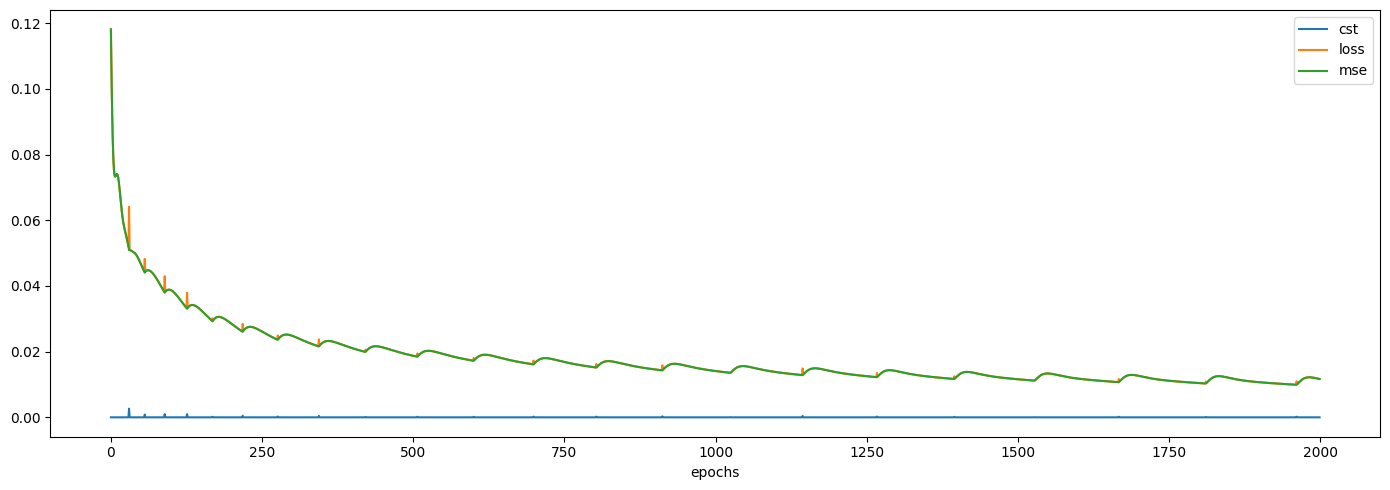

Model loss: 0.0117 (training)


In [2]:
didi_thr = 0.13
base_pred = util.build_ml_model(input_size=len(attributes), output_size=1, hidden=[])
nn2 = util.CstDIDIModel(base_pred, attributes, protected, alpha=5, thr=didi_thr)
history = util.train_ml_model(nn2, tr[attributes], tr[target], validation_split=0., epochs=2000, batch_size=len(tr))
util.plot_training_history(history, figsize=figsize)

## Fixed-Multiplier Approach Evaluation

**Let's check both the prediction quality and the DIDI**

In [3]:
tr_pred2 = nn2.predict(tr[attributes], verbose=0)
r2_tr2 = r2_score(tr[target], tr_pred2)
ts_pred2 = nn2.predict(ts[attributes], verbose=0)
r2_ts2 = r2_score(ts[target], ts_pred2)
tr_DIDI2 = util.DIDI_r(tr, tr_pred2, protected)
ts_DIDI2 = util.DIDI_r(ts, ts_pred2, protected)

print(f'R2 score: {r2_tr2:.2f} (training), {r2_ts2:.2f} (test)')
print(f'DIDI: {tr_DIDI2:.2f} (training), {ts_DIDI2:.2f} (test)')

R2 score: 0.24 (training), 0.11 (test)
DIDI: 0.07 (training), 0.03 (test)


The constraint is satisfied _with some slack_, leading to reduced performance

* A large $\lambda$ (what we have here) slows down training 
* ...But a small $\lambda$ may lead to significant constraint violation

## Dual Ascent Approach

**Now, let's switch to the dual ascent approach**

```python
class LagDualDIDIRegressor(MLPRegressor):
    def __init__(self, base_pred, attributes, protected, thr):
        super(LagDualDIDIRegressor, self).__init__()
        self.alpha = tf.Variable(0., name='alpha')
        self.dual_optimizer = keras.optimizers.Adam()
        ...

    def __custom_loss(self, x, y_true, sign=1): ...

    def train_step(self, data): ...
        
    def metrics(self): ...
```

* We no longer pass a fixed `alpha` weight/multiplier
* Instead we use a _trainable variable_
* ...Which we'll manage through a separate optimizer

## Dual Ascent Approach

**In the `__custom_loss` method we compute the Lagrangian/regularized loss**

```python
def __custom_loss(self, x, y_true, sign=1):
    y_pred = self.base_pred(x, training=True) # obtain the predictions
    mse = self.compute_loss(x, y_true, y_pred) # main loss
    ymean = tf.math.reduce_mean(y_pred) # average prediction
    didi = 0 # DIDI computation
    for aidx, dom in self.protected.items():
        for val in dom:
            mask = (x[:, aidx] == val)
            didi += tf.math.abs(ymean - tf.math.reduce_mean(y_pred[mask]))
    cst = tf.math.maximum(0.0, didi - self.thr) # regularizer
    loss = mse + self.alpha * cst
    return sign*loss, mse, cst
```

* The code is the same as before
* ...Except that we can flip the loss sign via a function argument (i.e. `sign`)

## Dual Ascent Approach

**In the training method, we make _two distinct gradient steps:_**

```python
    def train_step(self, data):
        x, y_true = data # unpacking
        with tf.GradientTape() as tape: # first loss (minimization)
            loss, mse, cst = self.__custom_loss(x, y_true, sign=1)
        grads = tape.gradient(loss, wgt_vars) # adjust the network weights
        self.optimizer.apply_gradients(zip(grads, wgt_vars))
        with tf.GradientTape() as tape: # second loss (maximization)
            loss, mse, cst = self.__custom_loss(x, y_true, sign=-1)
        grads = tape.gradient(loss, mul_vars) # adjust lambda
        self.dual_optimizer.apply_gradients(zip([grads], [self.alpha]))
```

* In principle, we could even have used two distinct optimizers
* That would allow to keep (e.g.) separate momentum vectors

## Training the Dual Ascent Approach

**The new approach leads fewer oscillations at training time**

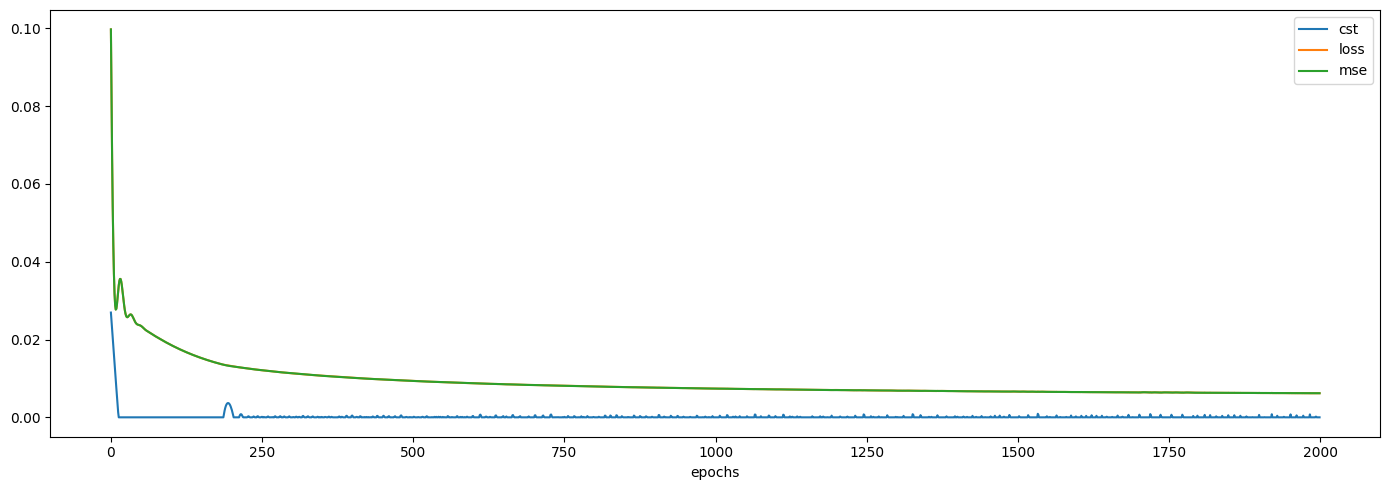

Model loss: 0.0062 (training)


In [4]:
base_pred = util.build_ml_model(input_size=len(attributes), output_size=1, hidden=[])
nn3 = util.LagDualDIDIModel(base_pred, attributes, protected, thr=didi_thr)
history = util.train_ml_model(nn3, tr[attributes], tr[target], validation_split=0.,epochs=2000, batch_size=len(tr))
util.plot_training_history(history, figsize=figsize)

## Lagrangian Dual Evaluation

**Let's check the new results**

In [5]:
tr_pred3 = nn3.predict(tr[attributes], verbose=0)
r2_tr3 = r2_score(tr[target], tr_pred3)
ts_pred3 = nn3.predict(ts[attributes], verbose=0)
r2_ts3 = r2_score(ts[target], ts_pred3)
tr_DIDI3 = util.DIDI_r(tr, tr_pred3, protected)
ts_DIDI3 = util.DIDI_r(ts, ts_pred3, protected)

print(f'R2 score: {r2_tr3:.2f} (training), {r2_ts3:.2f} (test)')
print(f'DIDI: {tr_DIDI3:.2f} (training), {ts_DIDI3:.2f} (test)')

R2 score: 0.59 (training), 0.52 (test)
DIDI: 0.13 (training), 0.13 (test)


* The DIDI has the desired value (on the test set, this is only roughly true)
* ...And the prediction quality is _much higher than before_!